In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df = pd.read_excel('Employee_Data.xlsx',skiprows=1,header=0)
df.head()

,Age,Gender,MonthlyIncome,Department,NumCompaniesWorked,Over18,workingfromhome,BusinessTravel,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,complaintresolved,complaintyears,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
0,31,Female,low,Research & Development,1,Y,0,Travel_Rarely,2,40,4,1,Y,0.0,11,1,1,1,0,No
1,32,Male,low,Research & Development,0,Y,0,Travel_Frequently,2,40,4,0,NaN,NaN,13,2,8,7,3,No
2,34,Female,medium,Research & Development,3,Y,1,Travel_Rarely,8,40,1,0,NaN,NaN,14,3,7,0,0,No
3,49,Male,high,Research & Development,4,Y,0,Travel_Rarely,1,40,3,0,NaN,NaN,14,3,23,8,0,No
4,27,Male,medium,Research & Development,1,Y,0,Travel_Rarely,19,40,1,0,NaN,NaN,11,1,7,7,0,No


The dataset contains 20 predictor variables and 1 outcome variable. The data has 1474 rows about current and former employees.

**Predictor Variables**:

- `Age`: age of employees (`int`)
- `Gender`: gender of employee (`object` or `dummies`)
- `MonthlyIncome`: low,medium,high (needs to be changed `Categorical?` or `dummies?` since it's an ordinal variable)
- `Department`: department employee works in (`object`/`string`)
- `NumCompaniesWorked`: the number of companies the employee worked at _BEFORE_ current (`int`)
- `Over18`: whether employee is over 18 or not (`bool`)
- `workingfromhome`: whether or not employee has option to work from home or not (`bool`)
- `BusinessTravel`: how often employee travels for business (`categorical` or `dummy`)
- `DistanceFromHome`: the distance employee lives from office (`int`)
- `StandardHours`: number of hours each employee works in a standard week (can be changed to `bool`)
- `JobSatisfaction`: range between 1 - 4 (`categorical` or `dummy`)
- `complaintfiled`: has employee filed a complaint? (`bool`)
- `complaintresolved`: has employee's complaint been resolved? (`bool`)
- `complaintyears`: years since complaint was filed (`int`)
- `PercentSalaryHike`: last percentage salary increase employee receieved (`int`)
- `PerformanceRating`: range between 1 - 5 (`categorical` or `dummy`)
- `TotalWorkingYears`: total number of years employee has worked (`int`)
- `YearsAtCompany`: number of years spent at company (`int`) (can create #years worked before company)
- `YearsSinceLastPromotion`: number of years since employee has been promoted (`int`)

**Outcome Variable**

- `Left`: whether or not the employee has left the company or not

In [2]:
print(df.Over18.value_counts())
print(df.StandardHours.value_counts())

Y    1474
Name: Over18, dtype: int64
40    1474
Name: StandardHours, dtype: int64


In [3]:
# same values for all rows
df = df.drop(columns = ['Over18','StandardHours'])

In [4]:
print('Number of rows in dataset:', len(df))
print('Number of people who are still at company:',len(df[df.Left=='No']))
print('Number of people who left company:', len(df[df.Left=='Yes']))
print(df.Left.value_counts(normalize=True))

Number of rows in dataset: 1474
Number of people who are still at company: 1233
Number of people who left company: 241
No     0.836499
Yes    0.163501
Name: Left, dtype: float64


## column Groups

In [5]:
analysis_df = df.copy()

analysis_df['AgeGroup'] = analysis_df.Age.apply(lambda x: '18-24' if x < 25 else (
'25-35' if (x >= 25) & (x <= 35) else (
'36-49' if (x > 35) & (x < 50) else '50-60')))
analysis_df['distanceGroup'] = analysis_df.DistanceFromHome.apply(lambda x: 'close' if x <= 5 else (
'medium' if (x > 5) & (x <= 10) else 'far'))
analysis_df['salaryhikeGroup'] = analysis_df.PercentSalaryHike.apply(lambda x: '<=15' if x <= 15 else '>15')
analysis_df['totworkyrsGroup'] = analysis_df.TotalWorkingYears.apply(lambda x: 'entry' if x<=1 else (
'junior' if (x >=2) & (x <=4) else ('senior' if (x>=5) & (x<=10) else 'leader')))
analysis_df['yrsatcompGroup'] = analysis_df.YearsAtCompany.apply(lambda x: '0-2' if x<=2 else(
'3-6' if (x>=3) & (x<=6) else '>6'))
analysis_df['yrspromotionGroup'] = analysis_df.YearsSinceLastPromotion.apply(lambda x: 'recent' if x<=2 else 'longtime')

## `columns_to_plot`

In [6]:
columns_to_plot = ['AgeGroup','MonthlyIncome','Gender','Department',
                   'workingfromhome','BusinessTravel','distanceGroup','JobSatisfaction',
                   'PercentSalaryHike','totworkyrsGroup','yrsatcompGroup','yrspromotionGroup']

### All data plots

## HIGH & LOW Performing Employees

In [7]:
high_performers = analysis_df[(analysis_df.PerformanceRating == 4) | (analysis_df.PerformanceRating == 5)]
low_performers = analysis_df[(analysis_df.PerformanceRating == 1) | (analysis_df.PerformanceRating == 2)]

print('Number of employees:', len(analysis_df))
print('Number of employees still at company:', len(analysis_df[analysis_df.Left == 'No']))
print('Number of employees that left:', len(analysis_df[analysis_df.Left == 'Yes']))
print('Percentage that left:', len(analysis_df[analysis_df.Left == 'Yes'])/len(analysis_df))

print('-'*50)

print('Number of low performing employees:', len(low_performers))
print('Number of low performing employees still at company:', len(low_performers[low_performers.Left == 'No']))
print('Number of low performing employees that left:', len(low_performers[low_performers.Left == 'Yes']))
print('Percentage of low performers that left:', len(low_performers[low_performers.Left == 'Yes'])/len(low_performers))

print('-'*50)

print('Number of high performing employees:', len(high_performers))
print('Number of high performing employees still at company:', len(high_performers[high_performers.Left == 'No']))
print('Number of high performing employees that left:', len(high_performers[high_performers.Left == 'Yes']))
print('Percentage of high performers that left:', len(high_performers[high_performers.Left == 'Yes'])/len(high_performers))

Number of employees: 1474
Number of employees still at company: 1233
Number of employees that left: 241
Percentage that left: 0.16350067842605157
--------------------------------------------------
Number of low performing employees: 655
Number of low performing employees still at company: 543
Number of low performing employees that left: 112
Percentage of low performers that left: 0.17099236641221374
--------------------------------------------------
Number of high performing employees: 519
Number of high performing employees still at company: 432
Number of high performing employees that left: 87
Percentage of high performers that left: 0.1676300578034682


### HIGH PERFORMERS plots

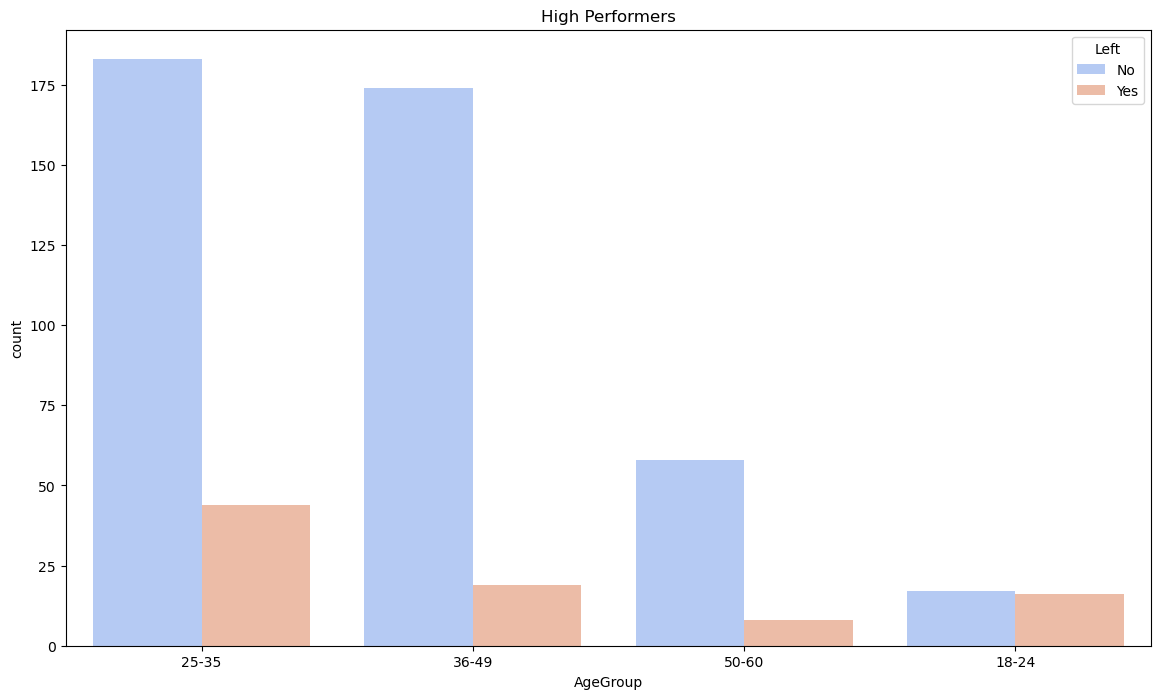

--------------------------------------------------
Left       No  Yes
AgeGroup          
18-24      17   16
25-35     183   44
36-49     174   19
50-60      58    8
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

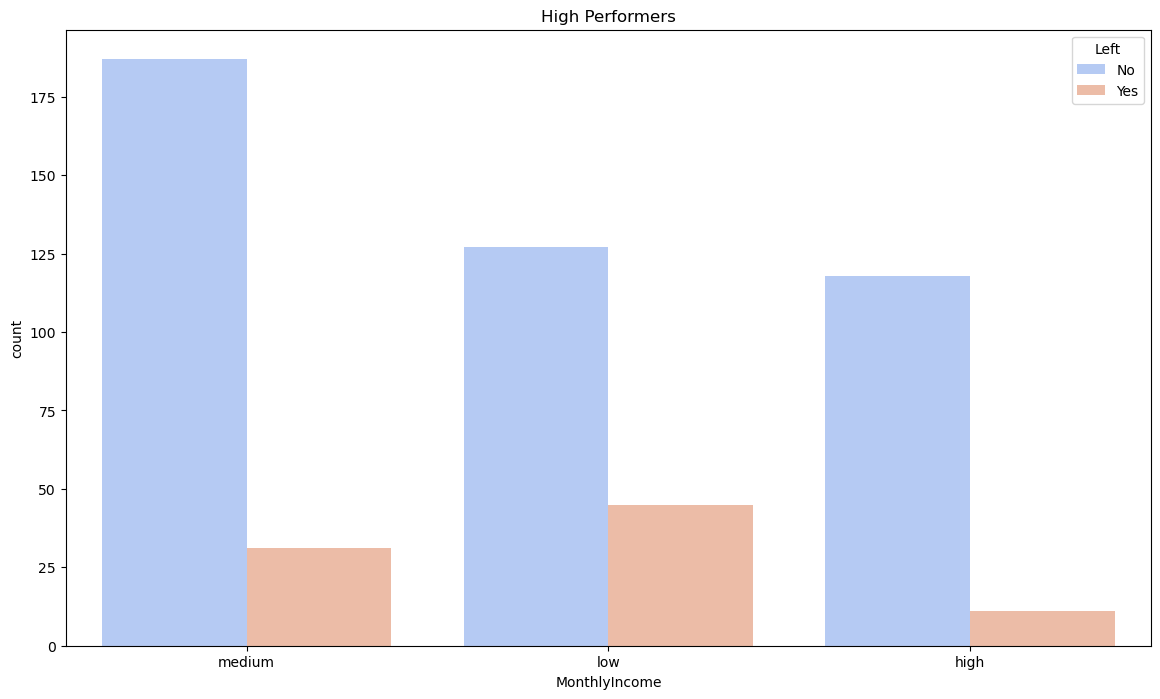

--------------------------------------------------
Left            No  Yes
MonthlyIncome          
high           118   11
low            127   45
medium         187   31
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

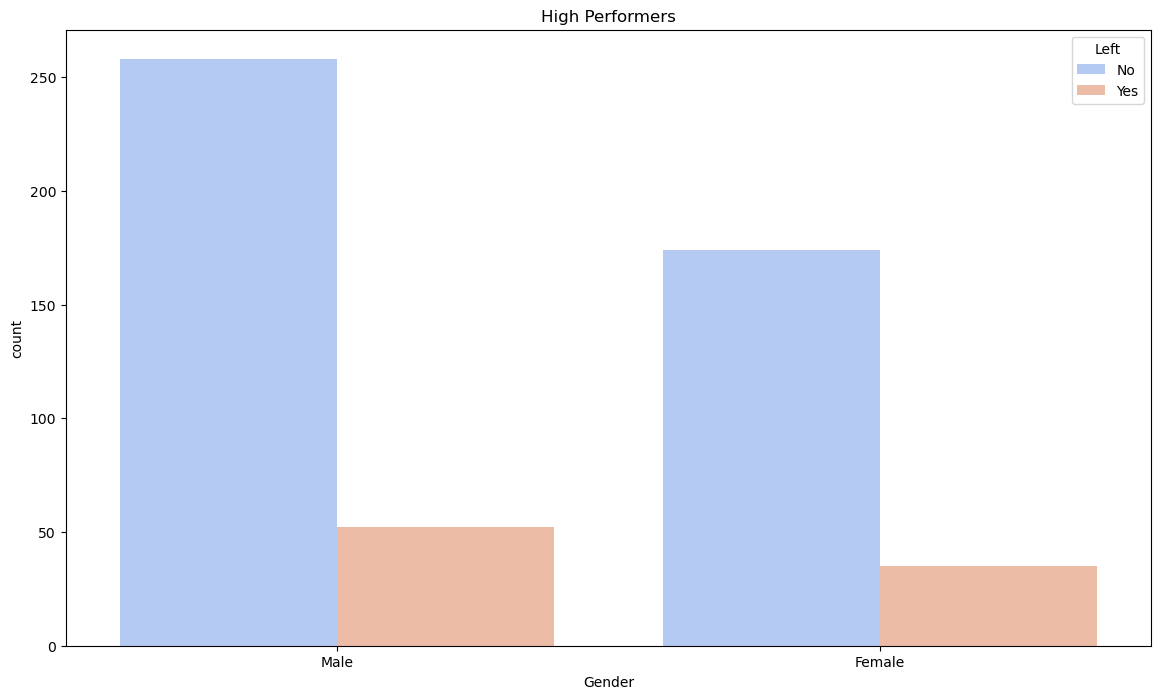

--------------------------------------------------
Left     No  Yes
Gender          
Female  174   35
Male    258   52
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

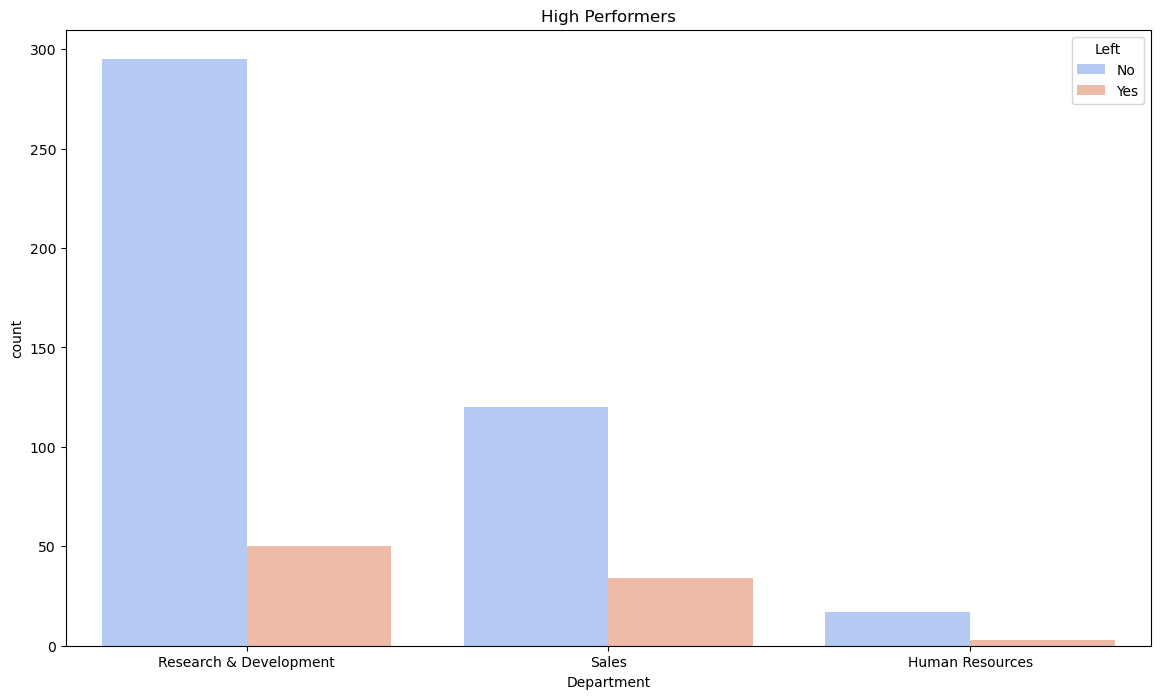

--------------------------------------------------
Left                     No  Yes
Department                      
Human Resources          17    3
Research & Development  295   50
Sales                   120   34
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

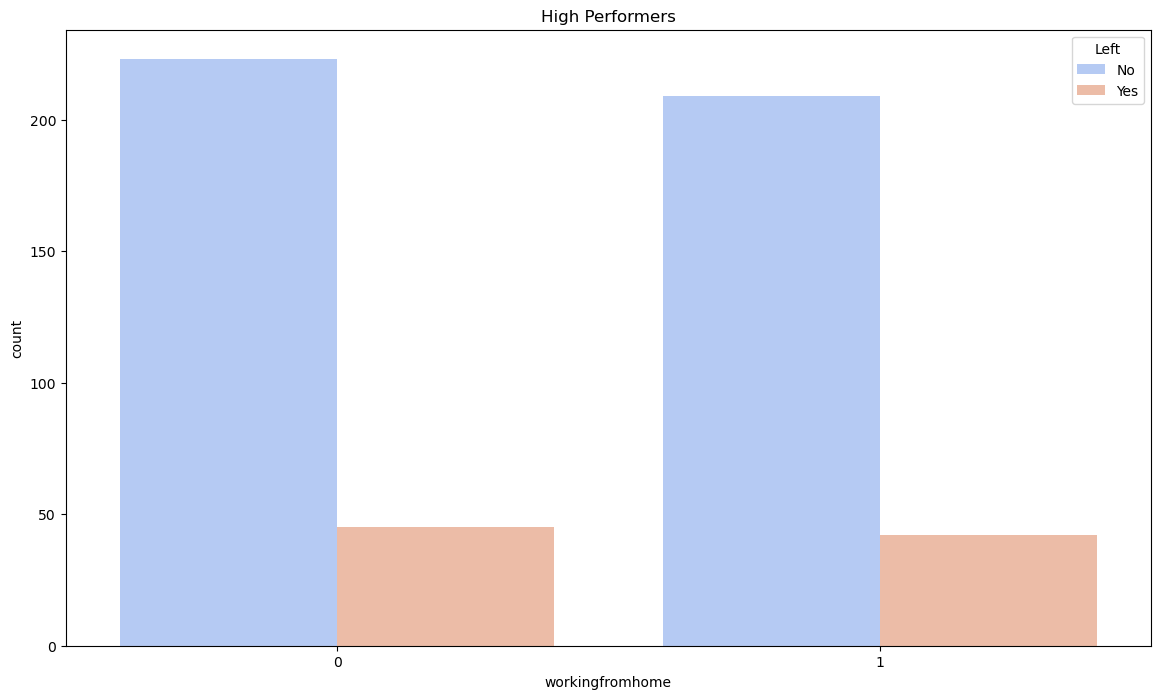

--------------------------------------------------
Left              No  Yes
workingfromhome          
0                223   45
1                209   42
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

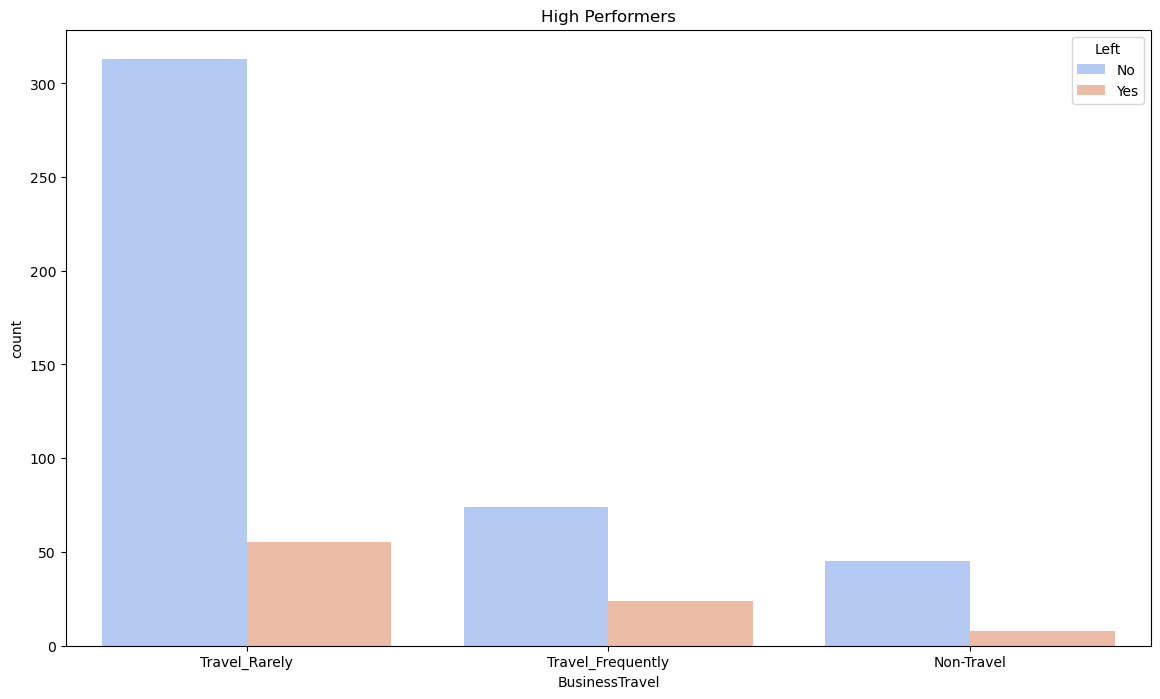

--------------------------------------------------
Left                No  Yes
BusinessTravel             
Non-Travel          45    8
Travel_Frequently   74   24
Travel_Rarely      313   55
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

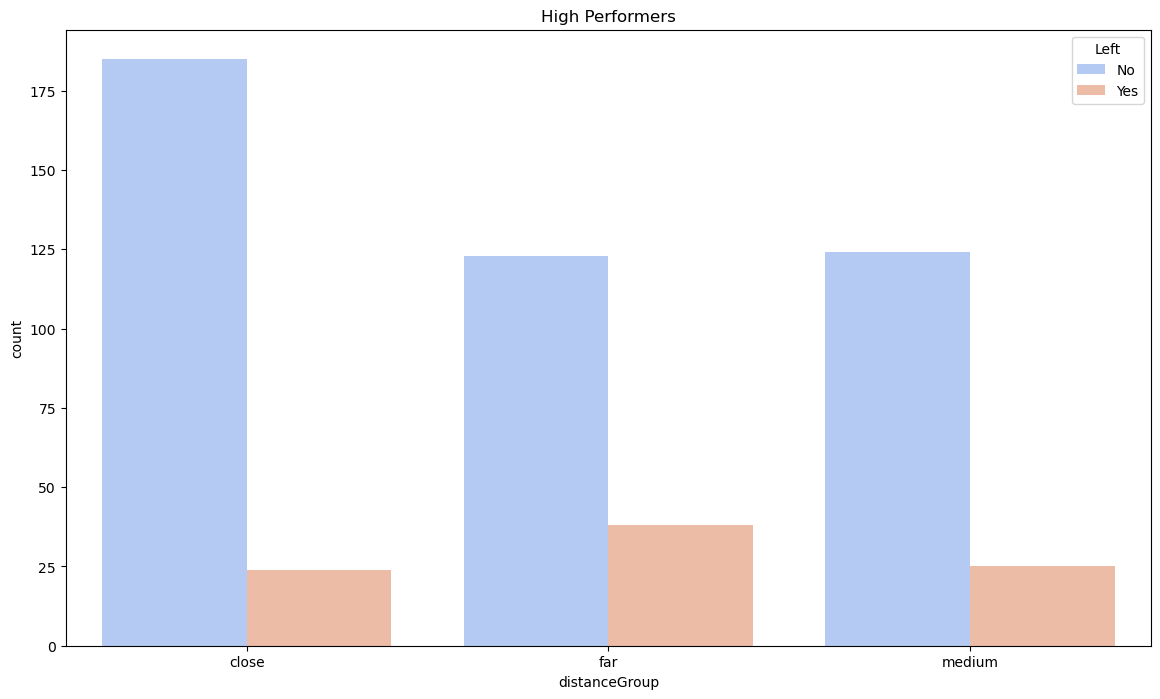

--------------------------------------------------
Left            No  Yes
distanceGroup          
close          185   24
far            123   38
medium         124   25
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

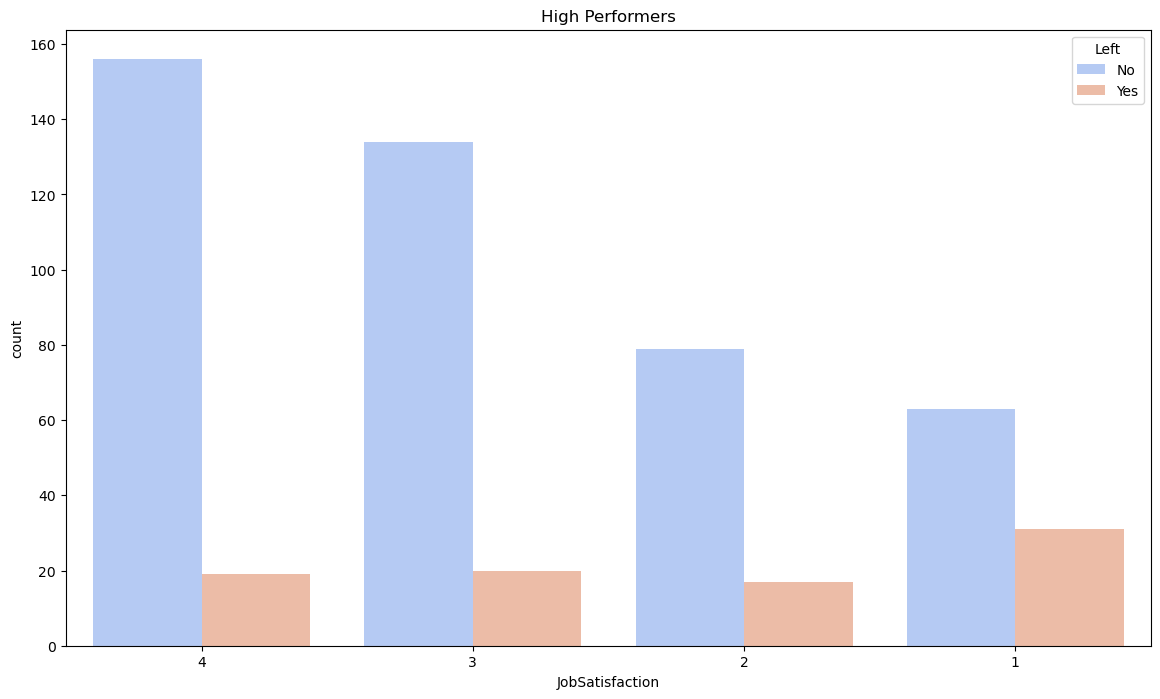

--------------------------------------------------
Left              No  Yes
JobSatisfaction          
1                 63   31
2                 79   17
3                134   20
4                156   19
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

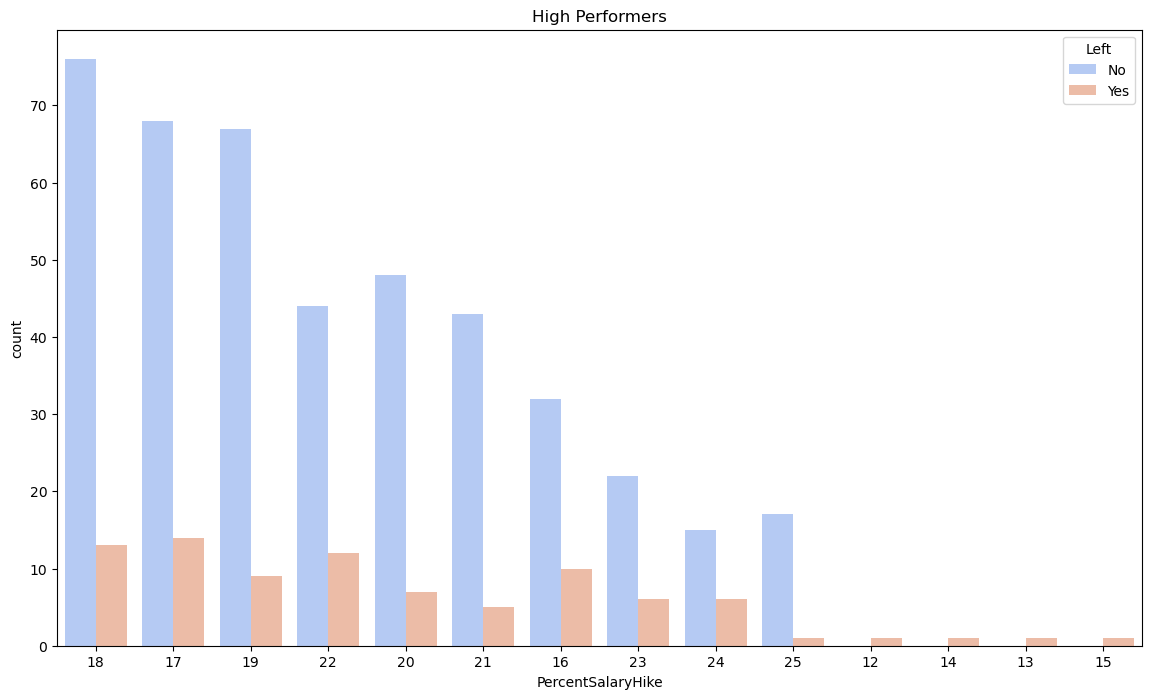

--------------------------------------------------
Left                 No   Yes
PercentSalaryHike            
12                  NaN   1.0
13                  NaN   1.0
14                  NaN   1.0
15                  NaN   1.0
16                 32.0  10.0
17                 68.0  14.0
18                 76.0  13.0
19                 67.0   9.0
20                 48.0   7.0
21                 43.0   5.0
22                 44.0  12.0
23                 22.0   6.0
24                 15.0   6.0
25                 17.0   1.0
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

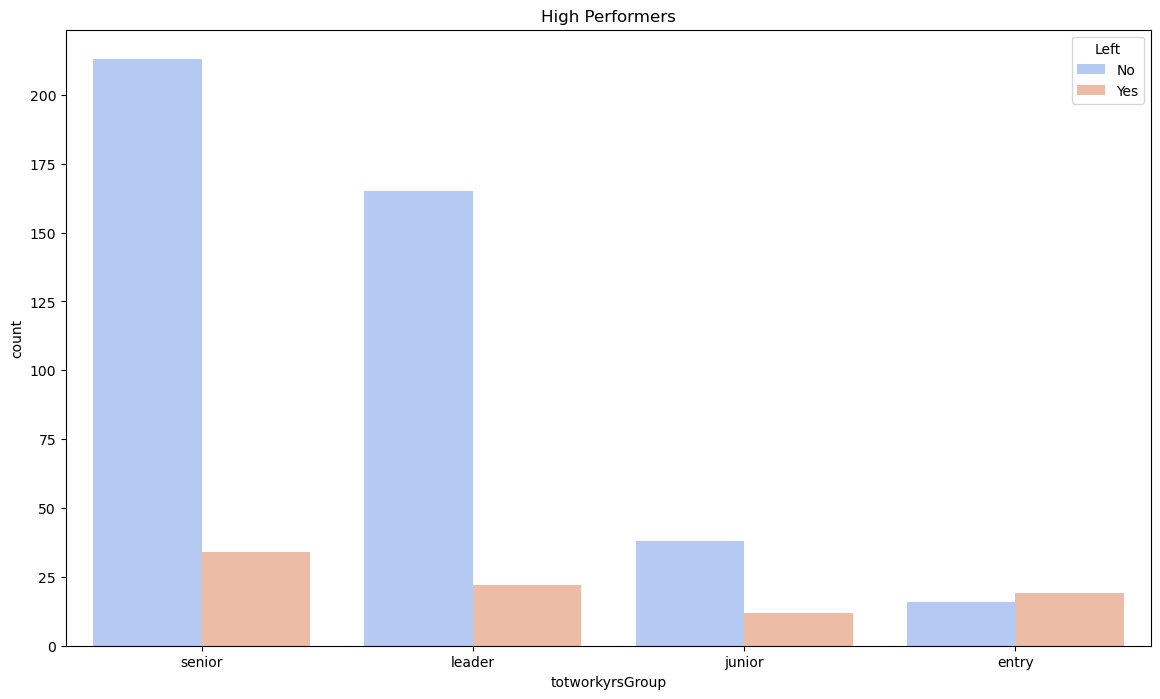

--------------------------------------------------
Left              No  Yes
totworkyrsGroup          
entry             16   19
junior            38   12
leader           165   22
senior           213   34
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

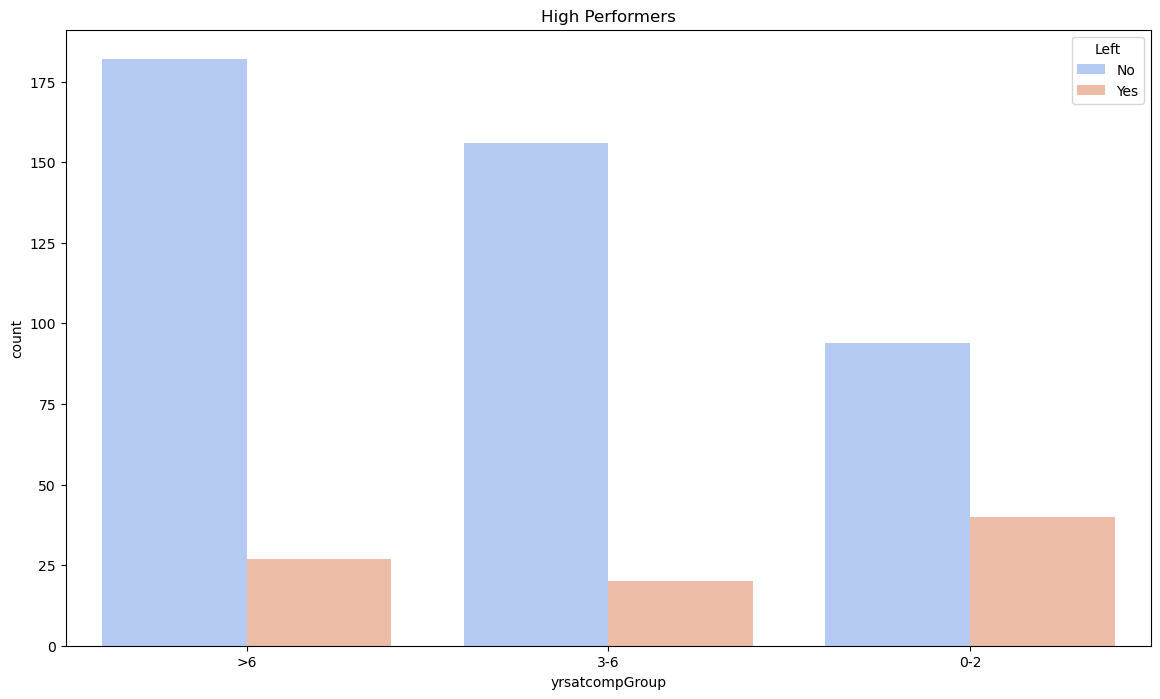

--------------------------------------------------
Left             No  Yes
yrsatcompGroup          
0-2              94   40
3-6             156   20
>6              182   27
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

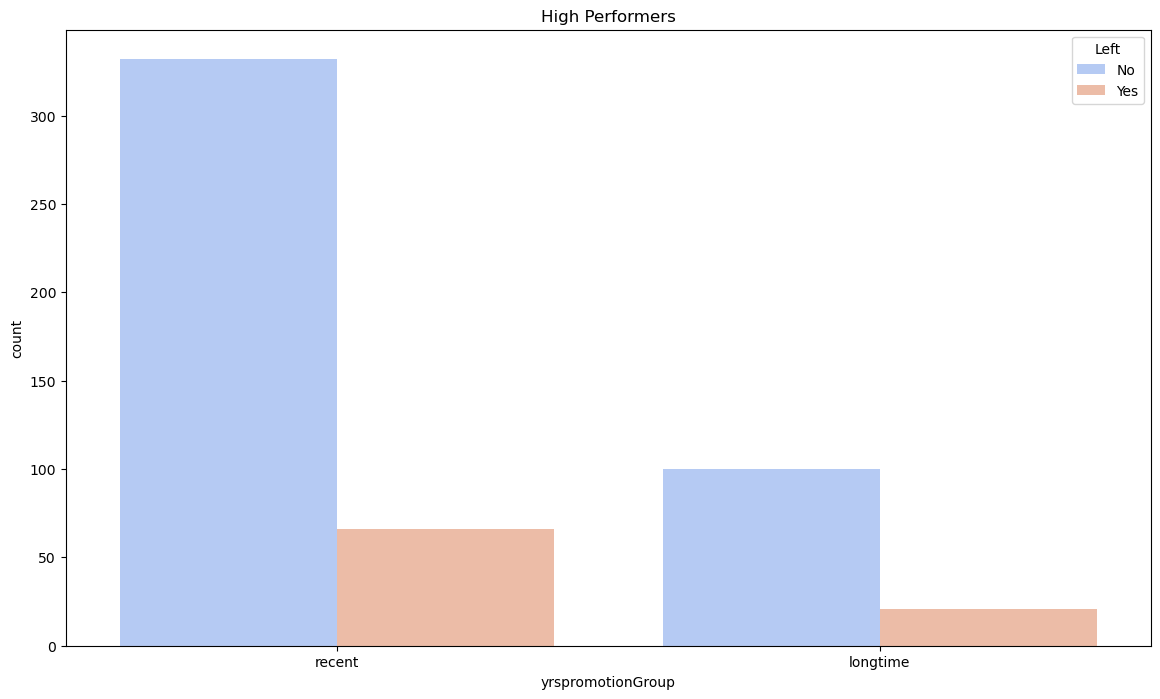

--------------------------------------------------
Left                No  Yes
yrspromotionGroup          
longtime           100   21
recent             332   66
--------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [8]:
for col in columns_to_plot:
    plt.figure(figsize=(14,8))
    sns.countplot(data=high_performers,x=col,
                  hue='Left',
                  order = high_performers[col].value_counts().index,
                 palette='coolwarm')
    plt.title('High Performers')
    plt.show()
    plt.clf()
    
    print('-'*50)
    unpivoted = high_performers.groupby([col,'Left']).Age.count().reset_index()
    pivoted = unpivoted.pivot(columns = 'Left', index = col, values = 'Age')
    print(pivoted)
    print('-'*50)

### LOW-PERFORMERS: ALL COLS

### COMPLAINT (NOT IMPORTANT)

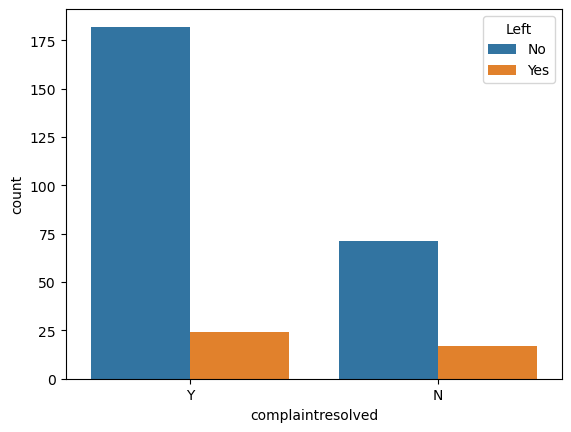

complaintresolved   N    Y
Left                      
No                 71  182
Yes                17   24
Percentage of people whose complaints were resolved but still left: 11.650485436893204
Percentage of people whose complaints weren't resolved and also left: 19.318181818181817


In [9]:
complaint_filed = analysis_df[analysis_df.complaintfiled == 1]
sns.countplot(data=complaint_filed,
              x = 'complaintresolved',
              hue = 'Left')
plt.show()

unpivoted = complaint_filed.groupby(['complaintresolved','Left']).Age.count().reset_index()
pivoted = unpivoted.pivot(columns = 'complaintresolved', index = 'Left', values = 'Age')
print(pivoted)

print('Percentage of people whose complaints were resolved but still left:',24/(24+182) * 100)
print('Percentage of people whose complaints weren\'t resolved and also left:',17/(17+71) * 100)

## BENEFITS ANALYSIS

In [10]:
print(analysis_df.columns)

Index(['Age', 'Gender', 'MonthlyIncome', 'Department', 'NumCompaniesWorked',
       'workingfromhome', 'BusinessTravel', 'DistanceFromHome',
       'JobSatisfaction', 'complaintfiled', 'complaintresolved',
       'complaintyears', 'PercentSalaryHike', 'PerformanceRating',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'Left', 'AgeGroup', 'distanceGroup', 'salaryhikeGroup',
       'totworkyrsGroup', 'yrsatcompGroup', 'yrspromotionGroup'],
      dtype='object')


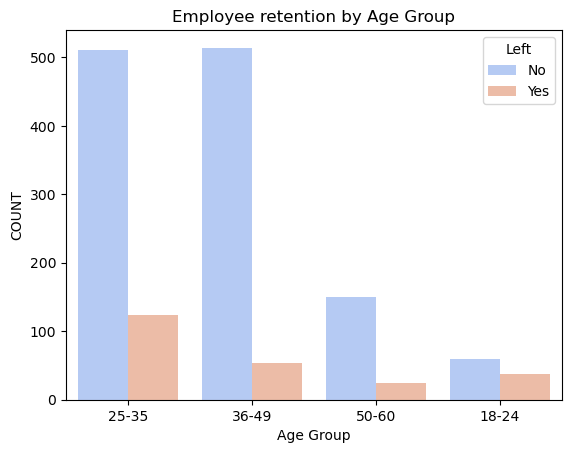

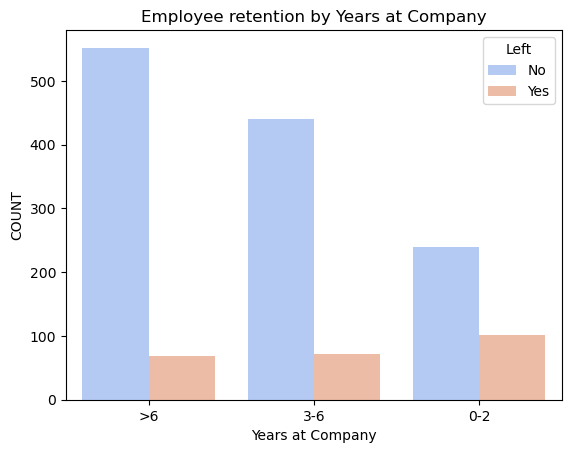

Left       No  Yes
AgeGroup          
18-24      59   38
25-35     510  124
36-49     514   54
50-60     150   25
--------------------------------------------------
Left             No  Yes
yrsatcompGroup          
0-2             240  102
3-6             441   71
>6              552   68


In [11]:
ax = sns.countplot(data=analysis_df,
                   x='AgeGroup',
                   hue='Left',
                   palette='coolwarm',
                   order = analysis_df.AgeGroup.value_counts().index)
plt.xlabel('Age Group')
plt.ylabel('COUNT')
plt.title('Employee retention by Age Group')
plt.savefig('agegroup_left.svg')
plt.show()
plt.clf()

sns.countplot(data=analysis_df,x='yrsatcompGroup',hue='Left',palette='coolwarm',order = analysis_df.yrsatcompGroup.value_counts().index)
plt.xlabel('Years at Company')
plt.ylabel('COUNT')
plt.title('Employee retention by Years at Company')
plt.savefig('compyrsgroup_left.svg')
plt.show()


unpivoted = analysis_df.groupby(['AgeGroup','Left']).Age.count().reset_index()
pivoted = unpivoted.pivot(columns = 'Left', index = 'AgeGroup', values = 'Age')

unpivoted_2 = analysis_df.groupby(['yrsatcompGroup','Left']).Age.count().reset_index()
pivoted_2 = unpivoted_2.pivot(columns = 'Left', index = 'yrsatcompGroup', values = 'Age')

print(pivoted)
print('-'*50)
print(pivoted_2)

In [12]:
print('%age of 18-24 that left', 38/(38+59)*100)
print('%age of 25-35 that left', 124/(124+510)*100)
print('%age of 36-49 that left', 54/(54+514)*100)
print('%age of 50-60 that left', 25/(25+150)*100)

print('-'*50)

print('% of 0-2 yrs that left', 102/(102+240)*100)
print('% of 3-6 yrs that left', 71/(71+441)*100)
print('% of >6 yrs that left', 68/(68+552)*100)

%age of 18-24 that left 39.175257731958766
%age of 25-35 that left 19.558359621451103
%age of 36-49 that left 9.507042253521126
%age of 50-60 that left 14.285714285714285
--------------------------------------------------
% of 0-2 yrs that left 29.82456140350877
% of 3-6 yrs that left 13.8671875
% of >6 yrs that left 10.967741935483872


In [13]:
analysis_df['performanceGroup'] = analysis_df.PerformanceRating.apply(lambda x: 'High' if (x==5) | (x==4) else (
'Medium' if x==3 else 'Low'))

lol =analysis_df.groupby(['AgeGroup','performanceGroup','Left']).Age.count()
print(lol)
lol2 = analysis_df.groupby(['yrsatcompGroup','performanceGroup','Left']).Age.count()
print(lol2)

AgeGroup  performanceGroup  Left
18-24     High              No       17
                            Yes      16
          Low               No       25
                            Yes      16
          Medium            No       17
                            Yes       6
25-35     High              No      183
                            Yes      44
          Low               No      235
                            Yes      62
          Medium            No       92
                            Yes      18
36-49     High              No      174
                            Yes      19
          Low               No      225
                            Yes      25
          Medium            No      115
                            Yes      10
50-60     High              No       58
                            Yes       8
          Low               No       58
                            Yes       9
          Medium            No       34
                            Yes       8
Name: A

In [14]:
pal = sns.color_palette('coolwarm',2)
print(pal.as_hex())

['#aac7fd', '#f7b89c']


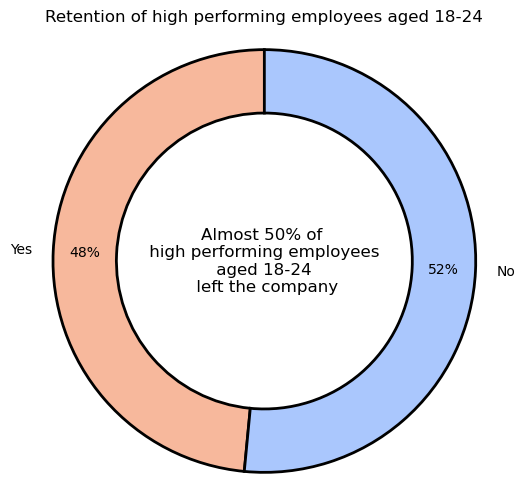

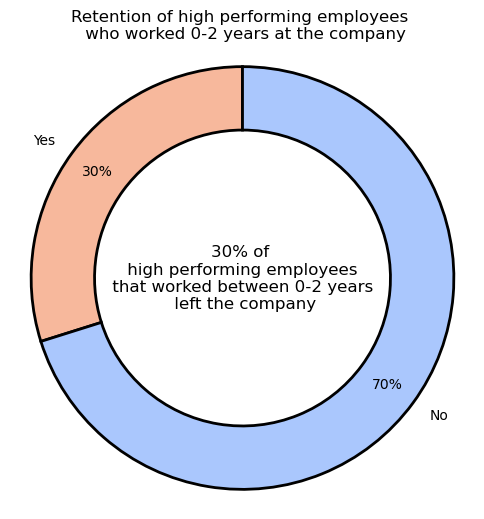

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
 
ax.pie([16/33,17/33], 
       wedgeprops={'width':0.3, 'edgecolor':'black', 'linewidth':2}, 
       startangle=90, 
       colors=['#f7b89c', '#aac7fd'],
       labels = ['Yes','No'],
       autopct='%1.0f%%',
       pctdistance=0.85,
       labeldistance=1.1)
plt.title('Retention of high performing employees aged 18-24')
plt.axis('equal')
plt.text(0, 0, 'Almost 50% of \n high performing employees \n aged 18-24 \n left the company', ha='center', va='center', fontsize=12)
plt.savefig('18_24_high_left.svg')
plt.show()

fig2, ax2 = plt.subplots(figsize=(6, 6))
 
ax2.pie([40/134,94/134], 
       wedgeprops={'width':0.3, 'edgecolor':'black', 'linewidth':2}, 
       startangle=90, 
       colors=['#f7b89c', '#aac7fd'],
       labels = ['Yes','No'],
       autopct='%1.0f%%',
       pctdistance=0.85,
       labeldistance=1.1)
plt.title('Retention of high performing employees \n who worked 0-2 years at the company')
plt.axis('equal')
plt.text(0, 0, '30% of \n high performing employees \n that worked between 0-2 years \n left the company', ha='center', va='center', fontsize=12)
plt.savefig('0_2yrs_high_left.svg')
plt.show()

# REMOTE-WORKING ANALYSIS

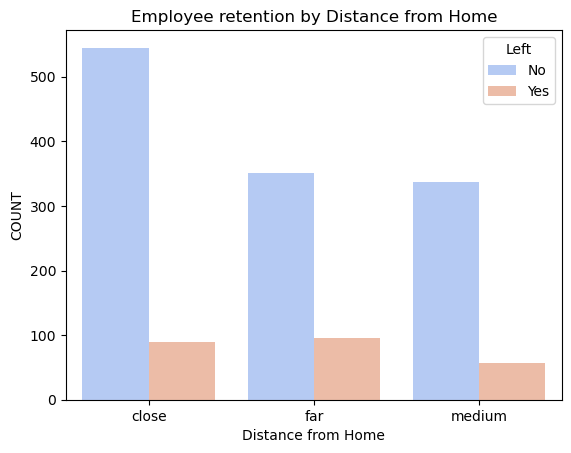

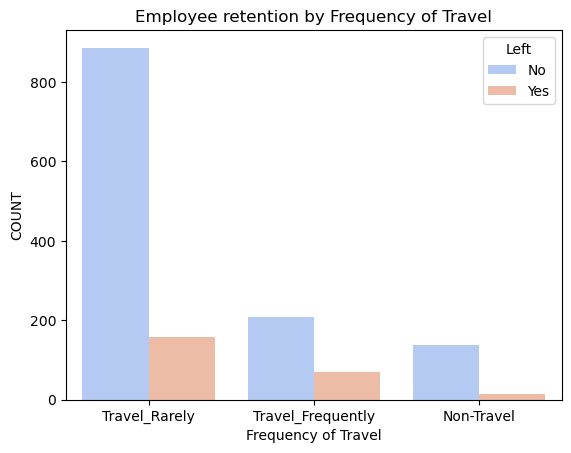

Left            No  Yes
distanceGroup          
close          545   89
far            351   95
medium         337   57
--------------------------------------------------
Left                No  Yes
BusinessTravel             
Non-Travel         138   14
Travel_Frequently  208   70
Travel_Rarely      887  157


In [16]:
ax = sns.countplot(data=analysis_df,
                   x='distanceGroup',
                   hue='Left',
                   palette='coolwarm',
                   order = analysis_df.distanceGroup.value_counts().index)
plt.xlabel('Distance from Home')
plt.ylabel('COUNT')
plt.title('Employee retention by Distance from Home')
plt.savefig('distgroup_left.svg')
plt.show()
plt.clf()

sns.countplot(data=analysis_df,x='BusinessTravel',hue='Left',palette='coolwarm',order = analysis_df.BusinessTravel.value_counts().index)
plt.xlabel('Frequency of Travel')
plt.ylabel('COUNT')
plt.title('Employee retention by Frequency of Travel')
plt.savefig('travel_left.svg')
plt.show()


unpivoted3 = analysis_df.groupby(['distanceGroup','Left']).Age.count().reset_index()
pivoted3 = unpivoted3.pivot(columns = 'Left', index = 'distanceGroup', values = 'Age')

unpivoted4 = analysis_df.groupby(['BusinessTravel','Left']).Age.count().reset_index()
pivoted4 = unpivoted4.pivot(columns = 'Left', index = 'BusinessTravel', values = 'Age')

print(pivoted3)
print('-'*50)
print(pivoted4)

In [17]:
lol =analysis_df.groupby(['distanceGroup','performanceGroup','Left']).Age.count()
print(lol)
lol2 = analysis_df.groupby(['BusinessTravel','performanceGroup','Left']).Age.count()
print(lol2)

distanceGroup  performanceGroup  Left
close          High              No      185
                                 Yes      24
               Low               No      255
                                 Yes      47
               Medium            No      105
                                 Yes      18
far            High              No      123
                                 Yes      38
               Low               No      148
                                 Yes      43
               Medium            No       80
                                 Yes      14
medium         High              No      124
                                 Yes      25
               Low               No      140
                                 Yes      22
               Medium            No       73
                                 Yes      10
Name: Age, dtype: int64
BusinessTravel     performanceGroup  Left
Non-Travel         High              No       45
                                     

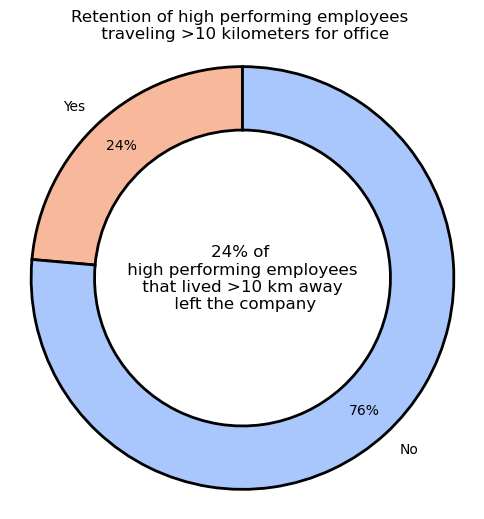

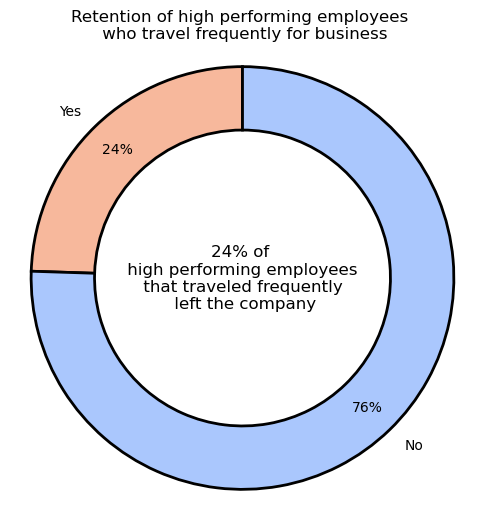

In [18]:
fig3, ax3 = plt.subplots(figsize=(6, 6))
 
ax3.pie([38/161,123/161], 
       wedgeprops={'width':0.3, 'edgecolor':'black', 'linewidth':2}, 
       startangle=90, 
       colors=['#f7b89c', '#aac7fd'],
       labels = ['Yes','No'],
       autopct='%1.0f%%',
       pctdistance=0.85,
       labeldistance=1.1)
plt.title('Retention of high performing employees \n traveling >10 kilometers for office')
plt.axis('equal')
plt.text(0, 0, '24% of \n high performing employees \n that lived >10 km away \n left the company', ha='center', va='center', fontsize=12)
plt.savefig('dist_far_left.svg')
plt.show()

fig4, ax4 = plt.subplots(figsize=(6, 6))
 
ax4.pie([24/98,74/98], 
       wedgeprops={'width':0.3, 'edgecolor':'black', 'linewidth':2}, 
       startangle=90, 
       colors=['#f7b89c', '#aac7fd'],
       labels = ['Yes','No'],
       autopct='%1.0f%%',
       pctdistance=0.85,
       labeldistance=1.1)
plt.title('Retention of high performing employees \n who travel frequently for business')
plt.axis('equal')
plt.text(0, 0, '24% of \n high performing employees \n that traveled frequently \n left the company', ha='center', va='center', fontsize=12)
plt.savefig('travelfreq_high_left.svg')
plt.show()

## COMPENSATION ANALYSIS

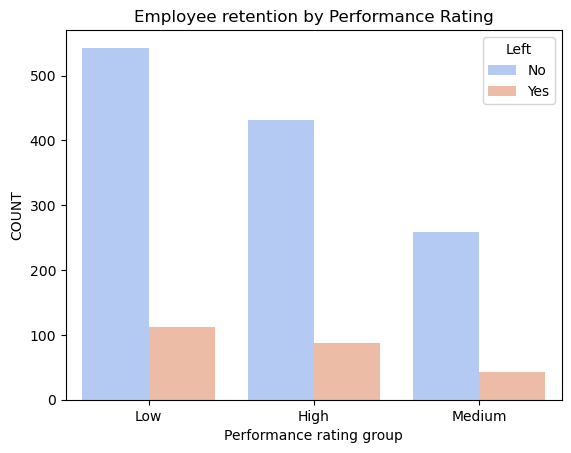

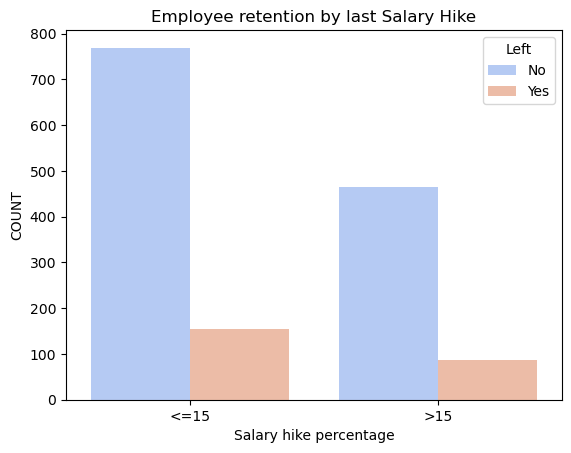

Left               No  Yes
performanceGroup          
High              432   87
Low               543  112
Medium            258   42
--------------------------------------------------
Left              No  Yes
salaryhikeGroup          
<=15             769  154
>15              464   87


In [19]:
sns.countplot(data=analysis_df,
                   x='performanceGroup',
                   hue='Left',
                   palette='coolwarm',
                   order = analysis_df.performanceGroup.value_counts().index)
plt.xlabel('Performance rating group')
plt.ylabel('COUNT')
plt.title('Employee retention by Performance Rating')
plt.savefig('performancegroup_left.svg')
plt.show()
plt.clf()

sns.countplot(data=analysis_df,x='salaryhikeGroup',hue='Left',palette='coolwarm',order = analysis_df.salaryhikeGroup.value_counts().index)
plt.xlabel('Salary hike percentage')
plt.ylabel('COUNT')
plt.title('Employee retention by last Salary Hike')
plt.savefig('salaryhike_left.svg')
plt.show()


unpivoted5 = analysis_df.groupby(['performanceGroup','Left']).Age.count().reset_index()
pivoted5 = unpivoted5.pivot(columns = 'Left', index = 'performanceGroup', values = 'Age')

unpivoted6 = analysis_df.groupby(['salaryhikeGroup','Left']).Age.count().reset_index()
pivoted6 = unpivoted6.pivot(columns = 'Left', index = 'salaryhikeGroup', values = 'Age')

print(pivoted5)
print('-'*50)
print(pivoted6)

In [20]:
lol = analysis_df.groupby(['salaryhikeGroup','performanceGroup','Left']).Age.count()
print(lol)

salaryhikeGroup  performanceGroup  Left
<=15             High              Yes       4
                 Low               No      543
                                   Yes     112
                 Medium            No      226
                                   Yes      38
>15              High              No      432
                                   Yes      83
                 Medium            No       32
                                   Yes       4
Name: Age, dtype: int64


In [21]:
%store analysis_df
%store df

Stored 'analysis_df' (DataFrame)
Stored 'df' (DataFrame)
